In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

### Α1: Συγκέντρωση των Δεδομένων

In [2]:
noaa_hellinikon = pd.read_csv("noaa_hellinikon_1955_2020.csv")

In [3]:
noaa_hellinikon.head()

,STATION,NAME,DATE,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN


In [4]:
noaa_hellinikon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23251 entries, 0 to 23250
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  23251 non-null  object 
 1   NAME     23251 non-null  object 
 2   DATE     23251 non-null  object 
 3   TAVG     20940 non-null  float64
dtypes: float64(1), object(3)
memory usage: 726.7+ KB


In [5]:
ath = pd.read_csv(
    "athens.csv",
    names=["DATE", "TAVG", "TMAX", "TMIN", "HAVG", "HMAX", "HMIN", "PAVG", "PMAX", "PMIN",
         "daily_rain", "wind_speed_avg", "wind_dir", "wind_gust"]
)

In [6]:
ath.head()

,DATE,TAVG,TMAX,TMIN,HAVG,HMAX,HMIN,PAVG,PMAX,PMIN,daily_rain,wind_speed_avg,wind_dir,wind_gust
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8


In [7]:
data = noaa_hellinikon.merge(ath[["DATE", "TAVG"]], on="DATE", how="outer", suffixes=("_left", "_right"))
data

,STATION,NAME,DATE,TAVG_left,TAVG_right
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN,NaN
...,...,...,...,...,...
24099,NaN,NaN,2017-10-02,NaN,18.7
24100,NaN,NaN,2017-10-08,NaN,17.8
24101,NaN,NaN,2017-10-15,NaN,20.4
24102,NaN,NaN,2017-10-27,NaN,17.8


In [8]:
tavg = []
for idx in range(len(data)):    
    if not pd.isnull(data["TAVG_left"].iloc[idx]):
        tavg.append(data["TAVG_left"].iloc[idx])
    else:
        tavg.append(data["TAVG_right"].iloc[idx])
data["TAVG"] = tavg
data.drop(["TAVG_left", "TAVG_right"], inplace=True, axis=1)
data

,STATION,NAME,DATE,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN
...,...,...,...,...
24099,NaN,NaN,2017-10-02,18.7
24100,NaN,NaN,2017-10-08,17.8
24101,NaN,NaN,2017-10-15,20.4
24102,NaN,NaN,2017-10-27,17.8


In [9]:
data["DATE"] = pd.to_datetime(data["DATE"])
data.sort_values(by="DATE", inplace=True, kind="mergesort")
data.reset_index(drop=True, inplace=True)
data

,STATION,NAME,DATE,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN
...,...,...,...,...
24099,GR000016716,"HELLINIKON, GR",2020-12-27,16.6
24100,GR000016716,"HELLINIKON, GR",2020-12-28,14.8
24101,GR000016716,"HELLINIKON, GR",2020-12-29,16.3
24102,GR000016716,"HELLINIKON, GR",2020-12-30,16.4


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24104 entries, 0 to 24103
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  23251 non-null  object        
 1   NAME     23251 non-null  object        
 2   DATE     24104 non-null  datetime64[ns]
 3   TAVG     21793 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 753.4+ KB


### Α2: Απόκλιση Καλοκαιρινών Θερμοκρασιών 

* Consider the dataframe which consists of the summer period from 1974 to 1999.
* Calculate the mean temperature of this specific period.

In [11]:
data_1974_1999 = data[(data["DATE"]>"1973-12-31") & (data["DATE"]<"2000-01-01")]

In [12]:
years_1974_1999 = []
count = 1974
while count < 2000:
    years_1974_1999.append(str(count))
    count+=1

In [13]:
data_summer_1974_1999 = pd.DataFrame(columns=data_1974_1999.columns)

for year in years_1974_1999:
    df = data_1974_1999[(data_1974_1999["DATE"]>year+"-05-31") & (data_1974_1999["DATE"]<year+"-09-01")]
    data_summer_1974_1999 = pd.concat([data_summer_1974_1999, df])
    
data_summer_1974_1999

,STATION,NAME,DATE,TAVG
7091,GR000016716,"HELLINIKON, GR",1974-06-01,22.7
7092,GR000016716,"HELLINIKON, GR",1974-06-02,23.2
7093,GR000016716,"HELLINIKON, GR",1974-06-03,22.2
7094,GR000016716,"HELLINIKON, GR",1974-06-04,21
7095,GR000016716,"HELLINIKON, GR",1974-06-05,24
...,...,...,...,...
16309,GR000016716,"HELLINIKON, GR",1999-08-27,24.7
16310,GR000016716,"HELLINIKON, GR",1999-08-28,24.7
16311,GR000016716,"HELLINIKON, GR",1999-08-29,25.3
16312,GR000016716,"HELLINIKON, GR",1999-08-30,25.9


In [14]:
mean_temp = data_summer_1974_1999["TAVG"].mean()
mean_temp

26.232145850796297

* Calculate the mean summer temperature of every year from 1974 to 1999.

In [15]:
mean_per_year = []
for year in years_1974_1999:
    df_year = data_summer_1974_1999[data_summer_1974_1999["DATE"].dt.year == int(year)]
    mean_year = df_year["TAVG"].mean()
    mean_per_year.append(mean_year)
    
mean_per_year_dict = dict(zip(years_1974_1999, mean_per_year))
mean_per_year_dict

{'1974': 26.51279069767443,
 '1975': 25.93586956521739,
 '1976': 24.82065217391305,
 '1977': 26.558695652173913,
 '1978': 25.79021739130435,
 '1979': 26.150000000000002,
 '1980': 25.596739130434777,
 '1981': 25.557608695652174,
 '1982': 25.027173913043477,
 '1983': 24.348913043478255,
 '1984': 24.358695652173914,
 '1985': 25.968478260869563,
 '1986': 26.827173913043488,
 '1987': 25.914130434782603,
 '1988': 26.936956521739138,
 '1989': 26.09347826086957,
 '1990': 26.611956521739142,
 '1991': 26.086956521739122,
 '1992': 26.00108695652174,
 '1993': 26.803260869565207,
 '1994': 27.15760869565218,
 '1995': 27.109782608695657,
 '1996': 27.349999999999984,
 '1997': 26.43369565217392,
 '1998': 28.12826086956521,
 '1999': 27.97391304347826}

* Calculate the differences.

In [16]:
mean_differences = []
mean_colors = []

for mean in mean_per_year:
    diff = mean - mean_temp
    if diff >= 0:
        mean_colors.append("orange")
    else:
        mean_colors.append("b")
    mean_differences.append(diff)
    
dict(zip(years_1974_1999, mean_differences))

{'1974': 0.2806448468781326,
 '1975': -0.2962762855789052,
 '1976': -1.4114936768832465,
 '1977': 0.3265498013776167,
 '1978': -0.4419284594919475,
 '1979': -0.08214585079629444,
 '1980': -0.6354067203615195,
 '1981': -0.6745371551441224,
 '1982': -1.2049719377528199,
 '1983': -1.8832328073180413,
 '1984': -1.8734501986223826,
 '1985': -0.2636675899267331,
 '1986': 0.5950280622471915,
 '1987': -0.31801541601369365,
 '1988': 0.704810670942841,
 '1989': -0.138667589926726,
 '1990': 0.37981067094284526,
 '1991': -0.14518932905717463,
 '1992': -0.2310588942745575,
 '1993': 0.5711150187689107,
 '1994': 0.9254628448558826,
 '1995': 0.87763675789936,
 '1996': 1.117854149203687,
 '1997': 0.2015498013776238,
 '1998': 1.8961150187689135,
 '1999': 1.7417671926819622}

* Calculate 10 years rolling average.

In [17]:
stat = pd.DataFrame.from_dict(mean_per_year_dict, orient="index", columns=["Mean"])

In [18]:
stat["Rolling"] = stat["Mean"].rolling(10, min_periods=1).mean()

In [19]:
stat["Diff"] = stat["Rolling"] - mean_temp

In [20]:
stat

,Mean,Rolling,Diff
1974,26.512791,26.512791,0.280645
1975,25.935870,26.224330,-0.007816
1976,24.820652,25.756437,-0.475708
1977,26.558696,25.957002,-0.275144
1978,25.790217,25.923645,-0.308501
1979,26.150000,25.961371,-0.270775
1980,25.596739,25.909281,-0.322865
1981,25.557609,25.865322,-0.366824
1982,25.027174,25.772194,-0.459952
1983,24.348913,25.629866,-0.602280


* Plot the graph.

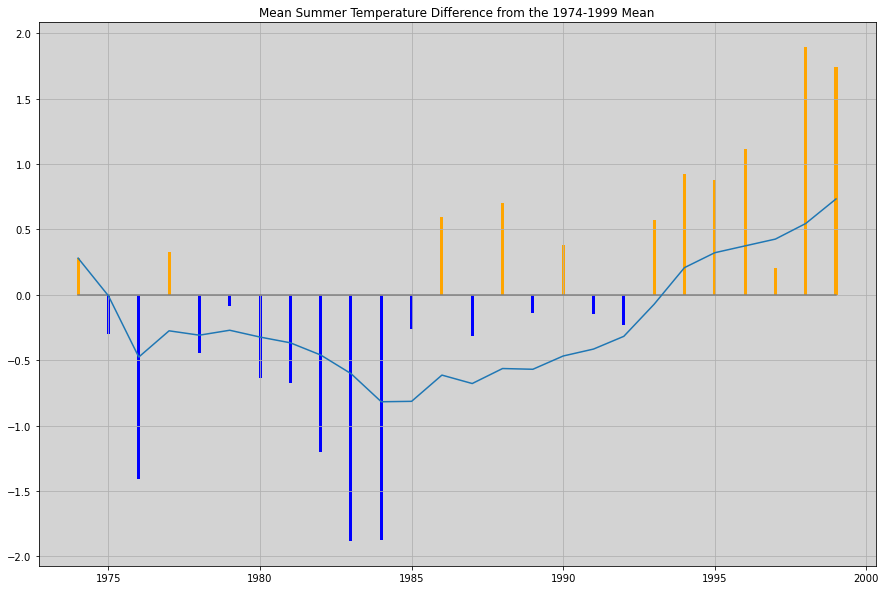

In [21]:
plt.figure(figsize=(15,10))

ax=plt.gca()
ax.set_facecolor("lightgray")

plt.bar(years_1974_1999, mean_differences, color=mean_colors, width=0.1)
plt.plot(years_1974_1999, [0]*len(years_1974_1999), color="gray")
plt.plot(years_1974_1999, list(stat["Diff"]))

plt.xticks(ticks=["1975", "1980", "1985", "1990", "1995", "2000"])

plt.grid()
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean")

plt.show()

* From 1974 to 1984 the majority of the mean temperatures of every year is smaller than the average temperature from 1974 to 1999.
* From 1985 to 1992 the mean temperature of every year either exceeds or is nearly close to the average temperature from 1974 to 1999.
* From 1993 to 1999 every mean temperature exceeds the average temperature from 1974 to 1999.
* Also, notice that from 1984 the 10 years rolling average starts to increase. 

### Α3: Εξέλιξη Ημερήσιων Θερμοκρασιών 

In [22]:
data = data[data["TAVG"] != "---"]
data["TAVG"] = data["TAVG"].astype(float)
data.reset_index(drop=True, inplace=True)
data["WeekDay"] = data["DATE"].dt.day_name()
data["Year"] = data["DATE"].dt.year

In [23]:
data

,STATION,NAME,DATE,TAVG,WeekDay,Year
0,GR000016716,"HELLINIKON, GR",1955-01-01,NaN,Saturday,1955
1,GR000016716,"HELLINIKON, GR",1955-01-02,NaN,Sunday,1955
2,GR000016716,"HELLINIKON, GR",1955-01-03,NaN,Monday,1955
3,GR000016716,"HELLINIKON, GR",1955-01-04,NaN,Tuesday,1955
4,GR000016716,"HELLINIKON, GR",1955-01-05,NaN,Wednesday,1955
...,...,...,...,...,...,...
24098,GR000016716,"HELLINIKON, GR",2020-12-27,16.6,Sunday,2020
24099,GR000016716,"HELLINIKON, GR",2020-12-28,14.8,Monday,2020
24100,GR000016716,"HELLINIKON, GR",2020-12-29,16.3,Tuesday,2020
24101,GR000016716,"HELLINIKON, GR",2020-12-30,16.4,Wednesday,2020


* For every day calculate the mean temperature of the time period 1974-1999.
* Create a dataframe consists of the day and the respective mean.
* Create a feature which will contain the rolling average.

In [24]:
data_1974_1999["MonthDay"] = data_1974_1999["DATE"].dt.strftime("%m-%d")
data_1974_1999["Year"] = data_1974_1999["DATE"].dt.year
data_1974_1999.reset_index(drop=True, inplace=True)

In [25]:
data_1974_1999

,STATION,NAME,DATE,TAVG,MonthDay,Year
0,GR000016716,"HELLINIKON, GR",1974-01-01,11.6,01-01,1974
1,GR000016716,"HELLINIKON, GR",1974-01-02,13.7,01-02,1974
2,GR000016716,"HELLINIKON, GR",1974-01-03,12.2,01-03,1974
3,GR000016716,"HELLINIKON, GR",1974-01-04,10.8,01-04,1974
4,GR000016716,"HELLINIKON, GR",1974-01-05,9.6,01-05,1974
...,...,...,...,...,...,...
9491,GR000016716,"HELLINIKON, GR",1999-12-27,15.4,12-27,1999
9492,GR000016716,"HELLINIKON, GR",1999-12-28,16.9,12-28,1999
9493,GR000016716,"HELLINIKON, GR",1999-12-29,15.1,12-29,1999
9494,GR000016716,"HELLINIKON, GR",1999-12-30,13.4,12-30,1999


In [26]:
mean_day_month = pd.DataFrame(columns=["MonthDay", "TAVG"])
for day in sorted(data_1974_1999["MonthDay"].unique()):
    subset = pd.DataFrame(columns=data_1974_1999.columns)
    for year in data_1974_1999["Year"].unique():
        df = data_1974_1999[(data_1974_1999["MonthDay"] == day) & (data_1974_1999["Year"] == year)]
        subset = pd.concat([subset, df])
    mean = subset["TAVG"].mean()
    element = pd.DataFrame({"MonthDay": subset["MonthDay"].unique(), "TAVG": mean})
    mean_day_month = pd.concat([mean_day_month, element])

In [27]:
mean_day_month["Rolling"] = mean_day_month["TAVG"].rolling(30, min_periods=1).mean()

In [28]:
mean_day_month

,MonthDay,TAVG,Rolling
0,01-01,10.365385,10.365385
0,01-02,10.707692,10.536538
0,01-03,10.207692,10.426923
0,01-04,9.634615,10.228846
0,01-05,9.919231,10.166923
...,...,...,...
0,12-27,9.769231,11.620641
0,12-28,10.207692,11.527436
0,12-29,10.776923,11.451282
0,12-30,11.353846,11.410000


* Plot the graph.

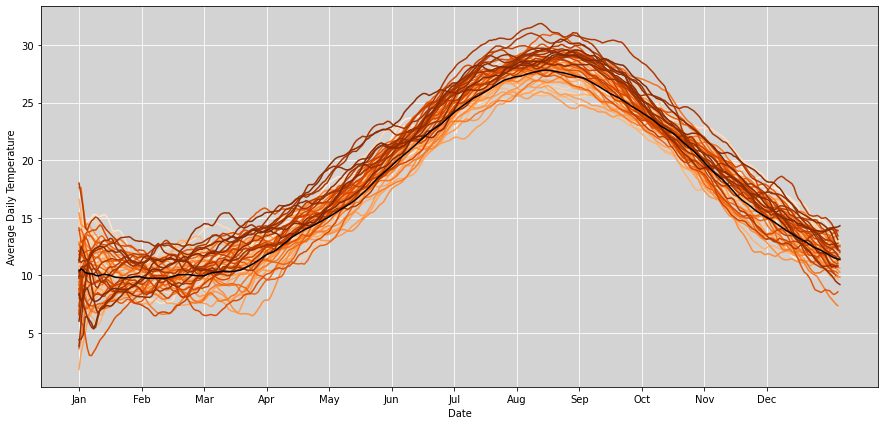

In [29]:
plt.figure(figsize=(15,7))

ax=plt.gca()
ax.set_facecolor("lightgray")

cmap = sns.color_palette("Oranges", n_colors=66)
pos=-1

# draw a line for every year with different color
for year in data["Year"].unique():
    pos+=1
    
    df_year = data[data["Year"] == year]
    df_year["Rolling"] = df_year["TAVG"].rolling(30, min_periods=1).mean()
    
    df_year.reset_index(drop=True, inplace=True)
  
    plt.plot([i for i in range(len(df_year))], list(df_year["Rolling"]), c=cmap[pos])

# draw a line that shows the rolling average for the time period 1974-1999
plt.plot([i for i in range(len(mean_day_month))], list(mean_day_month["Rolling"]), c="k")
    
plt.xticks(labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
           ticks=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330])

plt.grid(color="white")

plt.xlabel("Date")
plt.ylabel("Average Daily Temperature")

plt.show()